# Module 4 Project - Joe & Kalina

## Reducing Obesity in the USA

### Table of Contents

#### 1. Business Understanding

#### 2. Data Understanding

#### 3. Data Preparation

#### 4. Modelling

#### 5. Evaluation 

#### 6. Final Model

#### 7. Recommendations

### 1. Business Understanding

### 2. Data Understanding

In [21]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.express as px
%matplotlib inline
from itertools import combinations, product
from sklearn.model_selection import KFold,cross_val_predict,cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression,RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import scale
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_validate
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
df=pd.read_excel('2019 County Health Rankings Data - v2.xls',3,header=1)

df_addtl = pd.read_excel('2019 County Health Rankings Data - v2.xls',5,header=1)

xls = pd.ExcelFile('unemployment.xls')

unemployment = xls.parse('Unemployment Med HH Inc', skiprows=4, index_col=None, na_values=['NA'])

We used the 2019 County Health Rankings Data as our main source of data, with additional data from the Additional Data Sheet in the 2019 County Health xls file, as well as extra data on unemployment and median household income per state imported as unemployment

In [4]:
# This is a list of all the relevant columns that don't have percentiles or confidence interval data 
# and were deemed to be relevant to our target vairable, % adults who are obese

df=df[['FIPS','State', 'County',
           '% Fair/Poor',
           'Physically Unhealthy Days',
           'Mentally Unhealthy Days',
           '% Smokers',
           '% Obese',
           'Food Environment Index',
           '% Physically Inactive',
           '% With Access',
           '% Excessive Drinking',
           'PCP Rate',
           'Dentist Rate',
           'MHP Rate',
           'Graduation Rate',
           '% Some College',
           'Income Ratio',
           'Association Rate',
           '% Severe Housing Problems',
           '% Drive Alone',
           '% Long Commute - Drives Alone'
          ]]
df.head(3)

,FIPS,State,County,% Fair/Poor,Physically Unhealthy Days,Mentally Unhealthy Days,% Smokers,% Obese,Food Environment Index,% Physically Inactive,% With Access,% Excessive Drinking,PCP Rate,Dentist Rate,MHP Rate,Graduation Rate,% Some College,Income Ratio,Association Rate,% Severe Housing Problems,% Drive Alone,% Long Commute - Drives Alone
0,1001,Alabama,Autauga,18.411124,4.200578,4.306739,19.124658,37.5,7.2,31.1,68.677503,16.878015,41.50426,32.43010,16.21505,90.000000,60.854665,4.636664,12.631731,14.954646,85.965057,38.3
1,1003,Alabama,Baldwin,18.060458,4.098748,4.249649,16.795485,31.0,8.0,23.8,71.971031,16.714969,72.87966,49.85232,91.23916,86.361577,66.133926,4.518560,10.692213,13.831725,84.719423,40.5
2,1005,Alabama,Barbour,25.773416,5.067438,4.634994,21.540878,44.3,5.6,28.2,53.625669,12.698715,38.51338,35.61535,7.91452,81.410256,36.774008,5.755063,8.472944,15.455531,83.404353,33.8


In [5]:
# Additional relevant data was imported from the additional data sheet in 2019 County Health Rankings Data 

df_addtl = df_addtl[['FIPS',
                     '% Frequent Physical Distress',
                     '% Frequent Mental Distress',
                     '% Food Insecure',
                     '% Limited Access',
                     '% Insufficient Sleep',
                     '% Uninsured',
                     '% Homeowners',
                     '% Severe Housing Cost Burden',
                     'Population'
                    ]]
df_addtl.head()

,FIPS,% Frequent Physical Distress,% Frequent Mental Distress,% Food Insecure,% Limited Access,% Insufficient Sleep,% Uninsured,% Homeowners,% Severe Housing Cost Burden,Population
0,1001,12.824434,12.638357,13.4,11.991125,35.905406,10.961104,73.287736,12.645206,55504
1,1003,12.622002,12.822558,12.3,5.424427,33.305868,13.570311,72.859338,12.795922,212628
2,1005,16.216160,14.632311,23.2,10.739667,38.563167,16.542240,62.506800,13.586765,25270
3,1007,13.162968,12.854036,15.8,2.601627,38.148865,12.297319,75.361481,8.733889,22668
4,1009,13.720057,13.827943,11.0,2.880150,35.945010,15.564604,78.521025,8.194495,58013


In [6]:
# More relevant data was imported from unemployent file

unemployment = unemployment[['FIPS','Unemployment_rate_2018','Median_Household_Income_2018',
                            'Unemployed_avg(2007-2018)']]
unemployment.head()

,FIPS,Unemployment_rate_2018,Median_Household_Income_2018,Unemployed_avg(2007-2018)
0,0,3.9,61937.0,NaN
1,1000,3.9,49881.0,6.916667
2,1001,3.6,59338.0,6.008333
3,1003,3.6,57588.0,6.266667
4,1005,5.2,34382.0,9.466667


In [7]:
# These 3 dataframes were merged on FIPS

df_2 = (pd.merge(df,df_addtl, how='left', on=['FIPS']))

df_new = pd.merge(df_2, unemployment, how='left', on=['FIPS'])

df_new.head()

,FIPS,State,County,% Fair/Poor,Physically Unhealthy Days,Mentally Unhealthy Days,% Smokers,% Obese,Food Environment Index,% Physically Inactive,% With Access,% Excessive Drinking,PCP Rate,Dentist Rate,MHP Rate,Graduation Rate,% Some College,Income Ratio,Association Rate,% Severe Housing Problems,% Drive Alone,% Long Commute - Drives Alone,% Frequent Physical Distress,% Frequent Mental Distress,% Food Insecure,% Limited Access,% Insufficient Sleep,% Uninsured,% Homeowners,% Severe Housing Cost Burden,Population,Unemployment_rate_2018,Median_Household_Income_2018,Unemployed_avg(2007-2018)
0,1001,Alabama,Autauga,18.411124,4.200578,4.306739,19.124658,37.5,7.2,31.1,68.677503,16.878015,41.50426,32.43010,16.21505,90.000000,60.854665,4.636664,12.631731,14.954646,85.965057,38.3,12.824434,12.638357,13.4,11.991125,35.905406,10.961104,73.287736,12.645206,55504,3.6,59338.0,6.008333
1,1003,Alabama,Baldwin,18.060458,4.098748,4.249649,16.795485,31.0,8.0,23.8,71.971031,16.714969,72.87966,49.85232,91.23916,86.361577,66.133926,4.518560,10.692213,13.831725,84.719423,40.5,12.622002,12.822558,12.3,5.424427,33.305868,13.570311,72.859338,12.795922,212628,3.6,57588.0,6.266667
2,1005,Alabama,Barbour,25.773416,5.067438,4.634994,21.540878,44.3,5.6,28.2,53.625669,12.698715,38.51338,35.61535,7.91452,81.410256,36.774008,5.755063,8.472944,15.455531,83.404353,33.8,16.216160,14.632311,23.2,10.739667,38.563167,16.542240,62.506800,13.586765,25270,5.2,34382.0,9.466667
3,1007,Alabama,Bibb,19.996912,4.363377,4.315710,19.916404,37.8,7.6,34.9,16.251364,15.925151,57.41289,26.46903,8.82301,83.763838,48.406310,4.254594,10.157665,10.960854,86.365902,48.6,13.162968,12.854036,15.8,2.601627,38.148865,12.297319,75.361481,8.733889,22668,4.0,46064.0,7.508333
4,1009,Alabama,Blount,21.095323,4.512753,4.701599,19.652158,34.4,8.5,28.5,22.949304,15.378722,22.52877,20.68502,10.34251,93.468795,54.413998,4.126883,9.011507,10.401153,86.792275,59.7,13.720057,13.827943,11.0,2.880150,35.945010,15.564604,78.521025,8.194495,58013,3.5,50412.0,6.166667


### 3. Data Preparation

In [10]:
# Can see several null values

df_new.isna().sum()

FIPS                               0
State                              0
County                             0
% Fair/Poor                        0
Physically Unhealthy Days          0
Mentally Unhealthy Days            0
% Smokers                          0
% Obese                            0
Food Environment Index            19
% Physically Inactive              0
% With Access                      6
% Excessive Drinking               0
PCP Rate                         135
Dentist Rate                      85
MHP Rate                         252
Graduation Rate                   99
% Some College                     0
Income Ratio                       0
Association Rate                   0
% Severe Housing Problems          0
% Drive Alone                      0
% Long Commute - Drives Alone      0
% Frequent Physical Distress       0
% Frequent Mental Distress         0
% Food Insecure                    0
% Limited Access                  19
% Insufficient Sleep               0
%

In [11]:
# replace null values with state average

column_isna_list = ['Food Environment Index',
                    '% With Access',
               'PCP Rate',
                   'Dentist Rate',
                   'MHP Rate',
                    'Graduation Rate',
                    '% Limited Access'] 

for column in column_isna_list:
    df_new[column] = df_new.groupby("State")[column].transform(lambda x: x.fillna(x.mean()))


In [12]:
# did not replace those with one null value as they may be unusual so wanted to investigate
df_new.isna().sum()

FIPS                             0
State                            0
County                           0
% Fair/Poor                      0
Physically Unhealthy Days        0
Mentally Unhealthy Days          0
% Smokers                        0
% Obese                          0
Food Environment Index           0
% Physically Inactive            0
% With Access                    0
% Excessive Drinking             0
PCP Rate                         0
Dentist Rate                     0
MHP Rate                         0
Graduation Rate                  0
% Some College                   0
Income Ratio                     0
Association Rate                 0
% Severe Housing Problems        0
% Drive Alone                    0
% Long Commute - Drives Alone    0
% Frequent Physical Distress     0
% Frequent Mental Distress       0
% Food Insecure                  0
% Limited Access                 0
% Insufficient Sleep             0
% Uninsured                      1
% Homeowners        

In [13]:
# investigate remaining null values

df1 = df_new[df_new.isna().any(axis=1)]

df1


,FIPS,State,County,% Fair/Poor,Physically Unhealthy Days,Mentally Unhealthy Days,% Smokers,% Obese,Food Environment Index,% Physically Inactive,% With Access,% Excessive Drinking,PCP Rate,Dentist Rate,MHP Rate,Graduation Rate,% Some College,Income Ratio,Association Rate,% Severe Housing Problems,% Drive Alone,% Long Commute - Drives Alone,% Frequent Physical Distress,% Frequent Mental Distress,% Food Insecure,% Limited Access,% Insufficient Sleep,% Uninsured,% Homeowners,% Severe Housing Cost Burden,Population,Unemployment_rate_2018,Median_Household_Income_2018,Unemployed_avg(2007-2018)
548,15005,Hawaii,Kalawao,14.017149,3.214459,3.171273,12.671810,22.8,7.3,20.5,100.0,16.653588,0.0,0.0,0.0,82.878368,81.250000,5.477273,0.0,18.181818,32.812500,0.0,9.636388,9.996988,18.8,0.000000,38.328812,NaN,3.773585,6.666667,88,NaN,NaN,NaN
2673,48301,Texas,Loving,18.370342,3.618747,3.680144,19.109575,28.8,2.7,22.2,0.0,19.219299,0.0,0.0,0.0,92.775000,58.333333,2.628295,0.0,17.777778,71.794872,21.4,11.242246,11.759326,18.7,50.588235,32.594713,21.052632,51.612903,NaN,134,3.9,78637.0,5.875


In [14]:
# small population counties with multiple null values, so drop

df_new.dropna(how='any',inplace=True)
df_new.isna().sum()

FIPS                             0
State                            0
County                           0
% Fair/Poor                      0
Physically Unhealthy Days        0
Mentally Unhealthy Days          0
% Smokers                        0
% Obese                          0
Food Environment Index           0
% Physically Inactive            0
% With Access                    0
% Excessive Drinking             0
PCP Rate                         0
Dentist Rate                     0
MHP Rate                         0
Graduation Rate                  0
% Some College                   0
Income Ratio                     0
Association Rate                 0
% Severe Housing Problems        0
% Drive Alone                    0
% Long Commute - Drives Alone    0
% Frequent Physical Distress     0
% Frequent Mental Distress       0
% Food Insecure                  0
% Limited Access                 0
% Insufficient Sleep             0
% Uninsured                      0
% Homeowners        

No null values remaining

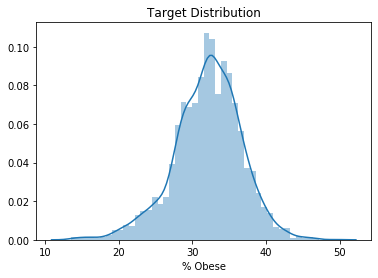

In [15]:
# Visualise target variable
sns.distplot(df_new['% Obese'])
plt.title('Target Distribution')
plt.show()

Our target variable shows a normal distribution with a slight right skew

### 4. Modelling

#### Build Baseline Model

In [16]:
# Split data into dependent and independent variables

X=df_new.drop(columns=['FIPS','State','County','% Obese'])
y=df_new['% Obese']

In [17]:
#Splitting Datasets into Training and Testing, ensuring that testing size is about 1000 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1348)

In [19]:
# Create baseling model with 5 fold cross validation
regression = LinearRegression()

crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X_train, y_train, scoring='r2', cv=crossvalidation))
baseline

0.5897322390225245

In [59]:
scores = cross_validate(regression, X_train, y_train, cv=5,
                        scoring=('r2'),
                         return_train_score=True)
print(scores)

{'fit_time': array([0.00814009, 0.00797534, 0.00527692, 0.00285816, 0.00293398]), 'score_time': array([0.0028379 , 0.00412583, 0.00137925, 0.00156975, 0.00141621]), 'test_score': array([0.55249274, 0.49330733, 0.53043563, 0.47402171, 0.46334104]), 'train_score': array([0.50140872, 0.52064374, 0.51193416, 0.5258668 , 0.52736127])}


Baseline model has R<sup>2</sup> score of ~0.59, and looking at the cross validation scores it does not appear to be overfitted

#### Check For Multicollinearity

In [22]:
# Use VIF with a threshold of 10 to select variables

def calculate_vif(X, thresh=10):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
              for ix in range(X.iloc[:, variables].shape[1])]
        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping\'' + X.iloc[:, variables].columns[maxloc] +
                 '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True
    print('Remaining variables')
    print(X.columns[variables])
    return X.iloc[:, variables]

calculate_vif(X_train)

dropping'% Frequent Physical Distress' at index: 18
dropping'% Frequent Mental Distress' at index: 18
dropping'Food Environment Index' at index: 4
dropping'Physically Unhealthy Days' at index: 1
dropping'% Insufficient Sleep' at index: 18
dropping'% Drive Alone' at index: 14
dropping'Mentally Unhealthy Days' at index: 1
dropping'Graduation Rate' at index: 8
dropping'% Homeowners' at index: 16
dropping'% Fair/Poor' at index: 0
dropping'Income Ratio' at index: 8
dropping'% Some College' at index: 7
dropping'% Smokers' at index: 0
dropping'Unemployed_avg(2007-2018)' at index: 16
dropping'% Severe Housing Problems' at index: 7
dropping'% Excessive Drinking' at index: 2
dropping'% Physically Inactive' at index: 0
dropping'% Food Insecure' at index: 6
dropping'Median_Household_Income_2018' at index: 11
dropping'% Severe Housing Cost Burden' at index: 8
dropping'% With Access' at index: 0
Remaining variables
Index(['PCP Rate', 'Dentist Rate', 'MHP Rate', 'Association Rate', '% Long Commute - 

,PCP Rate,Dentist Rate,MHP Rate,Association Rate,% Long Commute - Drives Alone,% Limited Access,% Uninsured,Population,Unemployment_rate_2018
1784,102.41953,78.18900,304.75032,11.400910,32.0,3.652384,10.894570,374733,3.7
1548,27.77117,27.74695,31.71080,12.695390,42.8,2.373916,16.075026,25228,3.7
649,51.61956,32.44331,178.43818,16.131114,14.2,6.731746,7.607200,30823,5.1
1113,36.71482,39.94248,78.28727,9.098891,38.5,0.601998,17.359968,62590,5.4
2877,55.03043,26.07052,81.47038,13.919461,35.1,3.870977,15.009181,30686,4.1
...,...,...,...,...,...,...,...,...,...
1613,73.68280,67.71172,290.32557,12.535645,12.9,3.467017,8.648625,107810,2.5
3059,126.30041,68.97632,381.04755,12.517105,24.1,5.134933,5.608690,536416,2.2
228,102.74033,113.56173,326.34163,5.684062,40.4,0.992587,6.197168,1938153,2.6
720,79.24279,61.89487,30.94743,10.565705,48.1,4.509808,9.877823,22619,3.7


VIF returned 9 variables, however will also include % Physically Inactive and % Food Insecure as 'common sense' variables

In [24]:
# Select the 11 variables from X_train and X_test
variables = ['% Physically Inactive', 
             '% Food Insecure',
             'PCP Rate', 
             'Dentist Rate', 
             'MHP Rate', 
             'Association Rate', 
             '% Long Commute - Drives Alone', 
             '% Limited Access', 
             '% Uninsured', 
             'Population',
            'Unemployment_rate_2018']

X_train = X_train.filter(variables, axis=1)
X_test = X_test.filter(variables, axis=1)

In [47]:
crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)
r2_vif = np.mean(cross_val_score(regression, X_train, y_train, scoring='r2', cv=crossvalidation))

scores = cross_validate(regression, X_train, y_train, cv=3,
                        scoring=('r2'),
                         return_train_score=True)

print('R2: ',r2_vif, 'Scores :',scores, sep='\n')


R2: 
0.5105370248027593
Scores :
{'fit_time': array([0.00293088, 0.0029161 , 0.00298119]), 'score_time': array([0.00182915, 0.00129485, 0.00136805]), 'test_score': array([0.55003738, 0.50044089, 0.47128811]), 'train_score': array([0.49594482, 0.52223773, 0.53487682])}


When variables have been removed, R<sup>2</sup> decreases, as expected, and we can see that model is still not overfit

Next, we add second degree polynomial and interaction complexity to model to increase complexity

In [40]:
# generate a new table for every test variable, every pairwise interation, and square of every variable of X_train

poly = PolynomialFeatures(2, include_bias=False)

X_transformed = poly.fit_transform(X_train)
poly.get_feature_names(X_train.columns)
dfx = pd.DataFrame(X_transformed)
dfx.columns = poly.get_feature_names(X_train.columns)
dfx

,% Physically Inactive,% Food Insecure,PCP Rate,Dentist Rate,MHP Rate,Association Rate,% Long Commute - Drives Alone,% Limited Access,% Uninsured,Population,Unemployment_rate_2018,% Physically Inactive^2,% Physically Inactive % Food Insecure,% Physically Inactive PCP Rate,% Physically Inactive Dentist Rate,% Physically Inactive MHP Rate,% Physically Inactive Association Rate,% Physically Inactive % Long Commute - Drives Alone,% Physically Inactive % Limited Access,% Physically Inactive % Uninsured,% Physically Inactive Population,% Physically Inactive Unemployment_rate_2018,% Food Insecure^2,% Food Insecure PCP Rate,% Food Insecure Dentist Rate,% Food Insecure MHP Rate,% Food Insecure Association Rate,% Food Insecure % Long Commute - Drives Alone,% Food Insecure % Limited Access,% Food Insecure % Uninsured,% Food Insecure Population,% Food Insecure Unemployment_rate_2018,PCP Rate^2,PCP Rate Dentist Rate,PCP Rate MHP Rate,PCP Rate Association Rate,PCP Rate % Long Commute - Drives Alone,PCP Rate % Limited Access,PCP Rate % Uninsured,PCP Rate Population,PCP Rate Unemployment_rate_2018,Dentist Rate^2,Dentist Rate MHP Rate,Dentist Rate Association Rate,Dentist Rate % Long Commute - Drives Alone,Dentist Rate % Limited Access,Dentist Rate % Uninsured,Dentist Rate Population,Dentist Rate Unemployment_rate_2018,MHP Rate^2,MHP Rate Association Rate,MHP Rate % Long Commute - Drives Alone,MHP Rate % Limited Access,MHP Rate % Uninsured,MHP Rate Population,MHP Rate Unemployment_rate_2018,Association Rate^2,Association Rate % Long Commute - Drives Alone,Association Rate % Limited Access,Association Rate % Uninsured,Association Rate Population,Association Rate Unemployment_rate_2018,% Long Commute - Drives Alone^2,% Long Commute - Drives Alone % Limited Access,% Long Commute - Drives Alone % Uninsured,% Long Commute - Drives Alone Population,% Long Commute - Drives Alone Unemployment_rate_2018,% Limited Access^2,% Limited Access % Uninsured,% Limited Access Population,% Limited Access Unemployment_rate_2018,% Uninsured^2,% Uninsured Population,% Uninsured Unemployment_rate_2018,Population^2,Population Unemployment_rate_2018,Unemployment_rate_2018^2
0,22.0,11.0,102.41953,78.18900,304.75032,11.400910,32.0,3.652384,10.894570,374733.0,3.7,484.00,242.00,2253.229660,1720.158000,6704.507040,250.820030,704.00,80.352452,239.680543,8244126.0,81.40,121.00,1126.614830,860.079000,3352.253520,125.410015,352.00,40.176226,119.840271,4122063.0,40.70,10489.760125,8008.080631,31212.384542,1167.675890,3277.424960,374.075470,1115.816753,3.837998e+07,378.952261,6113.519721,23828.122770,891.425788,2502.048000,285.576266,851.835544,2.930000e+07,289.299300,92872.757540,3474.431110,9752.010240,1113.065246,3320.123735,1.142000e+08,1127.576184,129.980759,364.829135,41.640505,124.208019,4.272297e+06,42.183369,1024.00,116.876294,348.626244,11991456.0,118.40,13.339910,39.791156,1.368669e+06,13.513821,118.691658,4.082555e+06,40.309910,1.404248e+11,1386512.1,13.69
1,26.5,14.6,27.77117,27.74695,31.71080,12.695390,42.8,2.373916,16.075026,25228.0,3.7,702.25,386.90,735.936005,735.294175,840.336200,336.427835,1134.20,62.908768,425.988190,668542.0,98.05,213.16,405.459082,405.105470,462.977680,185.352694,624.88,34.659170,234.695380,368328.8,54.02,771.237883,770.565265,880.646018,352.565834,1188.606076,65.926418,446.422281,7.006111e+05,102.753329,769.893234,879.877982,352.258351,1187.569460,65.868922,446.032944,7.000001e+05,102.663715,1005.574837,402.580973,1357.222240,75.278768,509.751936,8.000001e+05,117.329960,161.172927,543.362691,30.137786,204.078725,3.202793e+05,46.972943,1831.84,101.603594,688.011115,1079758.4,158.36,5.635476,38.160758,5.988915e+04,8.783488,258.406463,4.055408e+05,59.477596,6.364520e+08,93343.6,13.69
2,22.8,15.5,51.61956,32.44331,178.43818,16.131114,14.2,6.731746,7.607200,30823.0,5.1,519.84,353.40,1176.925968,739.707468,4068.390504,367.789392,323.76,153.483819,173.444164,702764.4,116.28,240.25,800.103180,502.871305,2765.791790,250.032262,220.10,104.342070,117

In [51]:
# Repeat the process for X_test
poly = PolynomialFeatures(2, include_bias=False)

X_test_transformed = poly.fit_transform(X_test)
poly.get_feature_names(X_test.columns)
dfx_test = pd.DataFrame(X_test_transformed)
dfx_test.columns = poly.get_feature_names(X_test.columns)

In [56]:
# Scale test and train X 

scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X_transformed))
# scaler

X_scaled.columns = dfx.columns

X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test_transformed))
X_test_scaled.columns = dfx_test.columns

### 5. Evaluation

In [58]:
crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)
r2_poly_and_inter = np.mean(cross_val_score(regression, X_transformed, y_train, scoring='r2', cv=crossvalidation))

scores = cross_validate(regression, X_scaled, y_train, cv=5,
                        scoring=('r2'),
                         return_train_score=True)

print('R2: ',r2_poly_and_inter, 'Scores :',scores, sep='\n')



R2: 
0.5374230709591418
Scores :
{'fit_time': array([0.00742698, 0.00892377, 0.00945282, 0.00735617, 0.02232766]), 'score_time': array([0.00150585, 0.00235319, 0.00221419, 0.0072279 , 0.00275517]), 'test_score': array([0.58930141, 0.47893933, 0.54645807, 0.52790318, 0.51767402]), 'train_score': array([0.58495625, 0.61123488, 0.60328732, 0.60776931, 0.60561253])}


Adding complexity has increased R<sup>2</sup> score and led to some slight overfitting

#### Optimising hyperparameters

In [61]:
# Optimise Ridge Regression parameters
Kfold = KFold(5)
rr = RidgeCV(alphas=(list(np.linspace(0.0, 50, 501))),cv=Kfold).fit(X_scaled,y_train)
rr.score(X_scaled,y_train)

0.5914303723731175

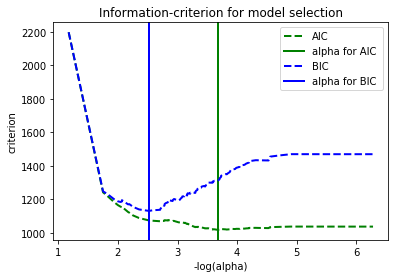

In [62]:
model_bic = LassoLarsIC(criterion='bic')
model_bic.fit(X_scaled, y_train)
alpha_bic_ = model_bic.alpha_

model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X_scaled, y_train)
alpha_aic_ = model_aic.alpha_


def plot_ic_criterion(model, name, color):
    alpha_ = model.alpha_
    alphas_ = model.alphas_
    criterion_ = model.criterion_
    plt.plot(-np.log10(alphas_), criterion_, '--', color=color, linewidth=2, label= name)
    plt.axvline(-np.log10(alpha_), color=color, linewidth=2,
                label='alpha for %s ' % name)
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')

plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'green')
plot_ic_criterion(model_bic, 'BIC', 'blue')
plt.legend()
plt.title('Information-criterion for model selection');

In [63]:
lr = LassoCV(alphas=(model_aic.alpha_, model_bic.alpha_),cv=Kfold).fit(X_scaled,y_train)
lr.score(X_scaled,y_train)

0.5956863522269251

In [64]:
lr.alpha_

0.003009015511083713

In [66]:
print(model_aic.alpha_, model_bic.alpha_,sep="\n")

0.000208131499561408
0.003009015511083713


In [67]:
eNet = ElasticNet()
parametersGrid = {"max_iter": [1, 5, 10],
                      "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1)}

In [69]:
grid = GridSearchCV(estimator=eNet, 
                    param_grid=parametersGrid,
                   scoring='r2',
                    cv=5,
                    refit=True,
                    error_score=0,
                    n_jobs=-1)

model = grid.fit(X_scaled, y_train)
optimised_random_forest = grid.best_estimator_
print(optimised_random_forest)

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.0,
           max_iter=10, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


In [70]:
elastic = ElasticNet(alpha=0.01,l1_ratio=0.0,max_iter=10)
model = elastic.fit(X_scaled, y_train)
pred=elastic.predict(X_scaled)
r2_score(y_train,pred)

0.558647468735876

In [107]:
lasso = Lasso(alpha = model_bic.alpha_)
model = lasso.fit(X_scaled, y_train)
lasso.score(X_scaled, y_train)

0.5956863522269251

In [97]:
pred=lasso.predict(X_test_scaled)
r2_score(y_test,pred)

0.5789688683683607

<Figure size 1080x720 with 0 Axes>

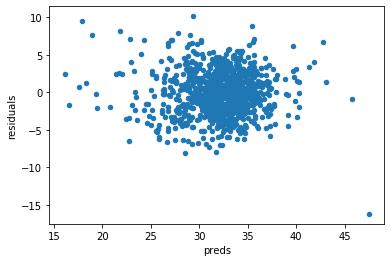

In [120]:
plt.figure(figsize=(15,10))

preds = pd.DataFrame({"preds":pred, "true":y_test})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.show();

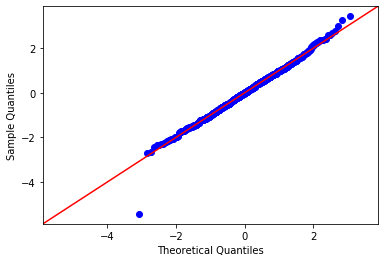

In [117]:
fig = sm.graphics.qqplot(preds['residuals'], dist=stats.norm, line='45', fit=True)


In [104]:
fig = sm.graphics.qqplot(lm.resid, dist=stats.norm, line='45', fit=True)

array([30.96731964, 32.64432868, 33.53017648, 31.85757714, 27.08734491,
       32.07271711, 33.32331478, 41.3832316 , 34.63135621, 27.53268866,
       30.99831808, 29.99156357, 30.09640231, 33.60771243, 26.84725435,
       32.27973421, 30.34935268, 32.97641454, 30.35368229, 35.62060215,
       35.19519796, 31.94550393, 31.00725615, 35.4556816 , 35.72071258,
       36.99568875, 19.4865666 , 33.44838346, 26.77906058, 45.7340983 ,
       31.84782557, 29.75068758, 31.73151661, 34.29786639, 30.9363972 ,
       33.16353287, 28.77007786, 28.45732746, 32.7171523 , 34.99621901,
       24.35082836, 34.51723097, 30.58083461, 33.87067518, 34.31996177,
       29.31158438, 33.41866637, 30.33015679, 28.86279354, 29.90810841,
       32.76714137, 33.15381245, 34.84432619, 34.99661891, 26.49631431,
       32.04858265, 28.96629356, 33.51700631, 39.18876996, 34.30698942,
       29.76725701, 33.88489774, 34.3018217 , 35.57058918, 31.7371136 ,
       33.07488871, 29.44058898, 33.34350696, 34.76392931, 31.04

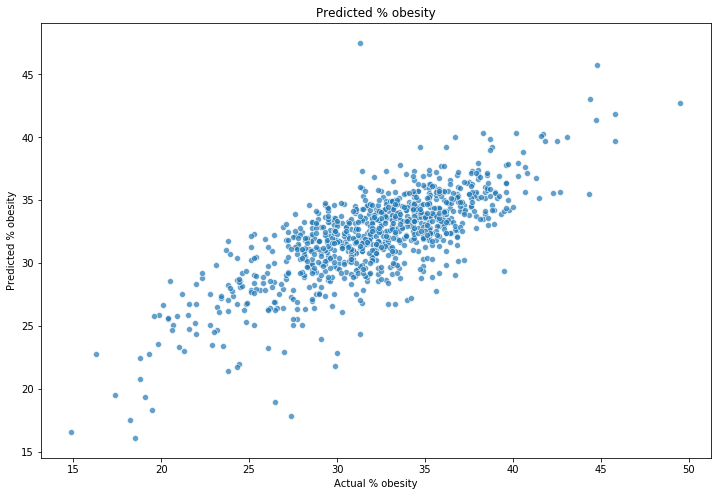

In [103]:
plt.figure(figsize=(12,8))
plt.title('Predicted % obesity')
sns.scatterplot(y_test,pred, alpha = 0.7)
plt.xlabel('Actual % obesity')
plt.ylabel('Predicted % obesity')
plt.show()

In [80]:
ft_importance = pd.Series(lr.coef_, index = X_scaled.columns)

ft_df = pd.DataFrame(ft_sorted, index = X_scaled.columns)

In [90]:
ft_df['Coefficients'] = ft_df[0]
del ft_df[0]
ft_df = ft_df.sort_values('Coefficients', ascending=False)
ft_df.reset_index(inplace=True)
ft_df.rename(columns={'index': 'Variables'}, inplace=True)
ft_df

,Variables,Coefficients
0,% Physically Inactive,5.646969
1,% Physically Inactive % Food Insecure,3.464723
2,Population,1.572691
3,% Physically Inactive % Long Commute - Drives ...,1.446885
4,Association Rate Population,1.285788
5,% Physically Inactive PCP Rate,0.893950
6,% Limited Access % Uninsured,0.885480
7,Population Unemployment_rate_2018,0.869015
8,% Physically Inactive Association Rate,0.857723
9,% Food Insecure^2,0.856593


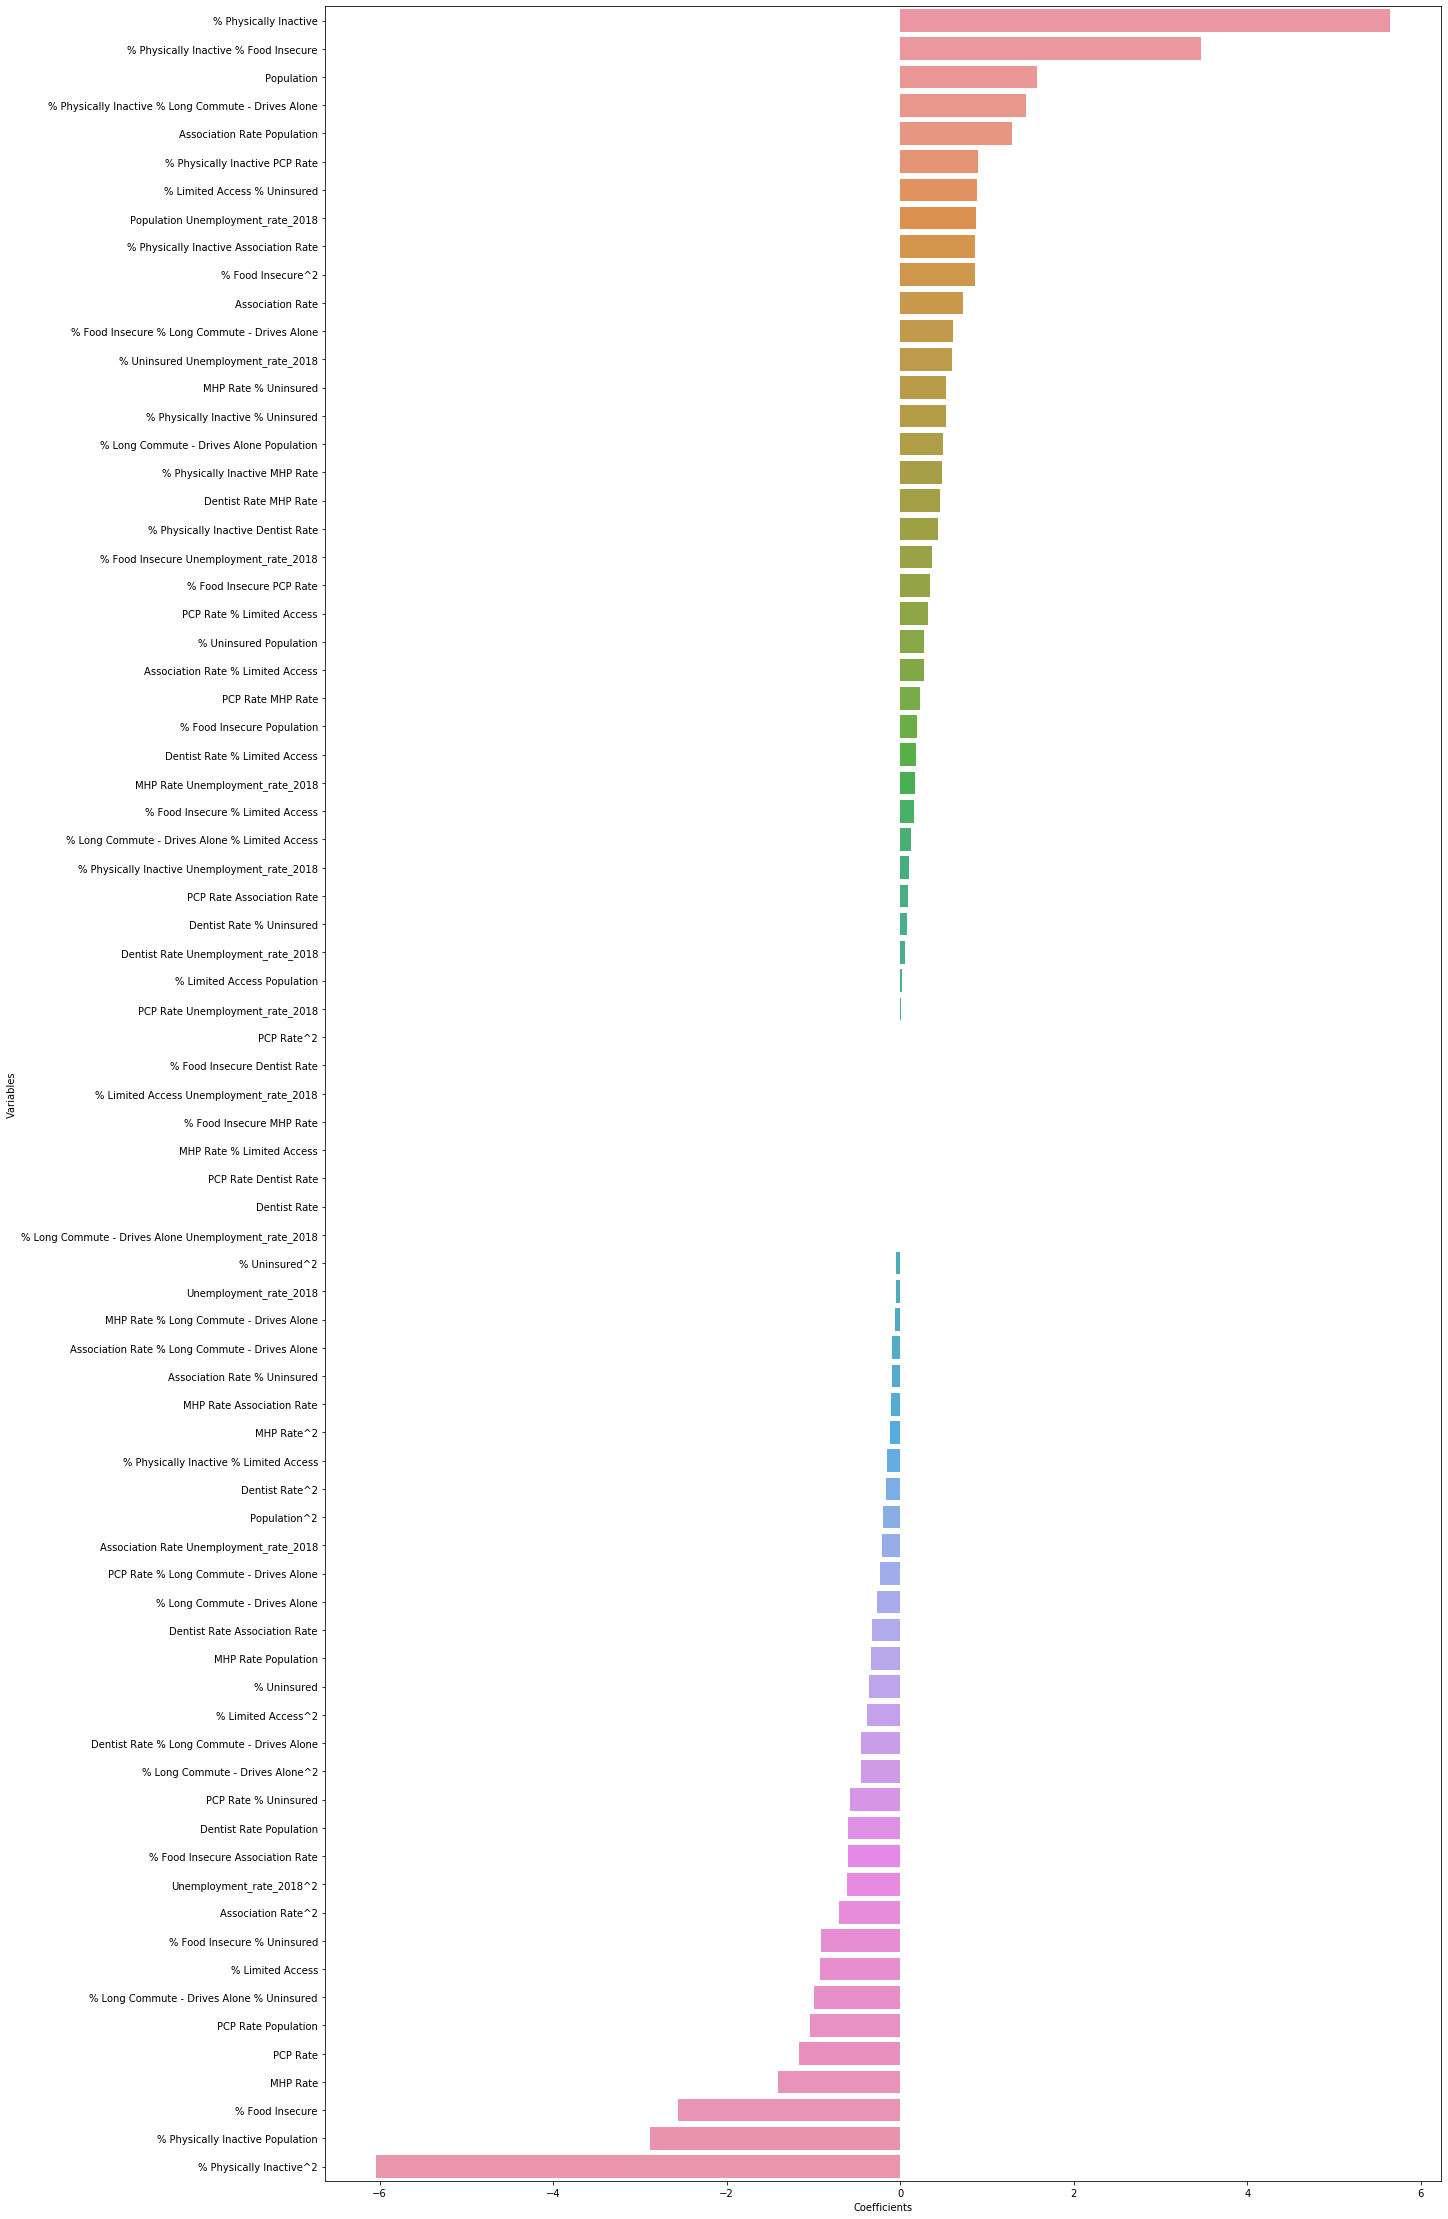

In [92]:
plt.figure(figsize=(20,40))
ax = sns.barplot(x='Coefficients', y='Variables', data=ft_df)
ax.set_xlabel('Coefficients');